# Compressing images with Discrete Cosine Basis

In [1]:
%matplotlib inline
import numpy as np
import scipy.fftpack
import scipy.misc
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
# Two auxiliary functions that we will use. You do not need to read them (but make sure to run this cell!)

def dct(n):
    return scipy.fftpack.dct(np.eye(n), norm='ortho')

def plot_vector(v, color='k'):
    plt.plot(v,linestyle='', marker='o',color=color)

## 5.3.1 The canonical basis

The vectors of the canonical basis are the columns of the identity matrix in dimension $n$. We plot their coordinates below for $n=8$.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

 Nothing new so far...


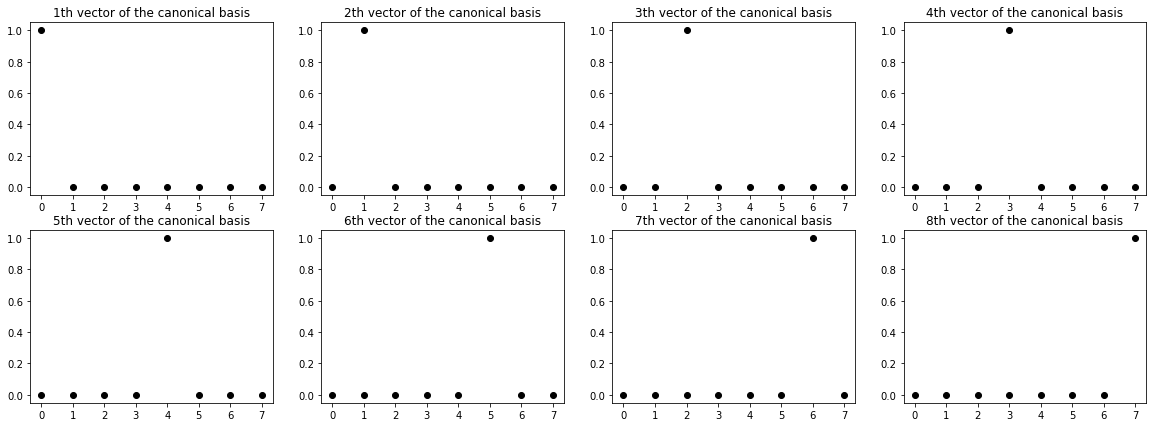

In [3]:
identity = np.identity(8)
print(identity)

plt.figure(figsize=(20,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th vector of the canonical basis")
    plot_vector(identity[:,i])
    
print('\n Nothing new so far...')

## 5.3.2 Discrete Cosine basis

The discrete Fourier basis is another basis of $\mathbb{R}^n$. The function `dct(n)` outputs a square matrix of dimension $n$ whose columns are the vectors of the discrete cosine basis.

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


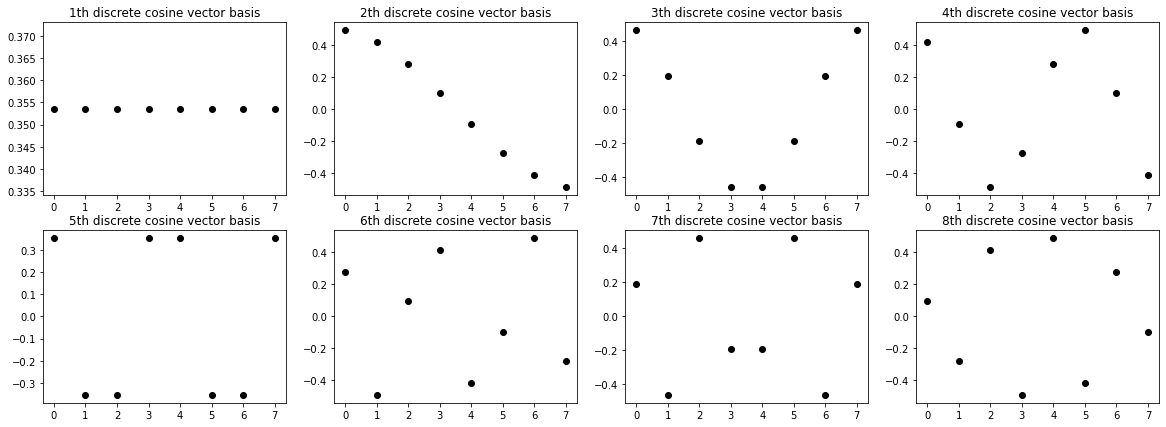

In [4]:
# Discrete Cosine Transform matrix in dimension n = 8
D8 = dct(8)
print(np.round(D8,3))

plt.figure(figsize=(20,7))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th discrete cosine vector basis")
    plot_vector(D8[:,i])

**5.3 (a)** Check numerically (in one line of code) that the columns of `D8` are an orthonormal basis of $\mathbb{R}^8$ (ie verify that the Haar wavelet basis is an orthonormal basis).

In [5]:
# Your answer here
#it's equivalent to check if ATA=Idn(round to 3 decimal places)
np.round((np.transpose(D8)@D8),3)
#the result is Idn so the columns of D8 are an orthonormal basis of R8

array([[ 1., -0.,  0., -0.,  0., -0., -0.,  0.],
       [-0.,  1., -0.,  0., -0., -0., -0.,  0.],
       [ 0., -0.,  1., -0.,  0., -0.,  0., -0.],
       [-0.,  0., -0.,  1., -0.,  0., -0., -0.],
       [ 0., -0.,  0., -0.,  1., -0., -0., -0.],
       [-0., -0., -0.,  0., -0.,  1.,  0., -0.],
       [-0., -0.,  0., -0., -0.,  0.,  1.,  0.],
       [ 0.,  0., -0., -0., -0., -0.,  0.,  1.]])

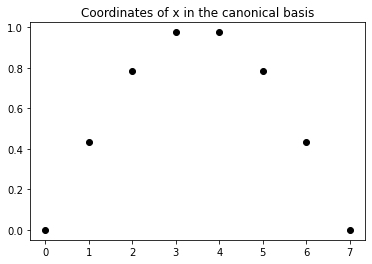

In [6]:
# Let consider the following vector x 
x = np.sin(np.linspace(0,np.pi,8))
plt.title('Coordinates of x in the canonical basis')
plot_vector(x)

**5.3 (b)** Compute the vector $v \in \mathbb{R}^8$ of DCT coefficients of $x$. (1 line of code!), and plot them.

How can we obtain back $x$ from $v$ ? (1 line of code!).

array([0.   , 0.434, 0.782, 0.975, 0.975, 0.782, 0.434, 0.   ])

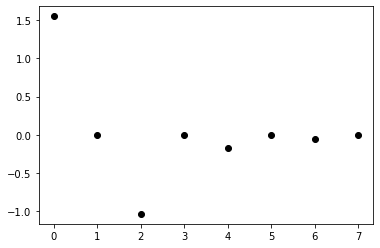

In [7]:
# Write your answer here
#the coefficients of x in (a1,a2,...,an) basis is ATx
v=np.transpose(D8)@x # or v=np.transpose(D8)@np.transpose(np.asmatrix(x)), same result
plot_vector(v)

#obtain x back
# v=ATx=A^(-1)x
# Av=AA^(-1)x=Ix=x
np.round(D8@v,3) 

In [8]:
np.round(x,3) #same as above

array([0.   , 0.434, 0.782, 0.975, 0.975, 0.782, 0.434, 0.   ])

## 5.3.3 Image compression
In this section, we will use DCT modes to compress images. Let's use one of the template images of python.

Height: 768, Width: 1024


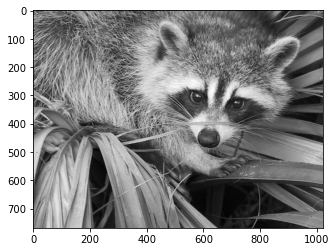

In [11]:
image = scipy.misc.face(gray=True)
h,w = image.shape
print(f'Height: {h}, Width: {w}')

plt.imshow(image)

In [12]:
image

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

**5.3 (c)** We will see each column of pixels as a vector in $\mathbb{R}^{768}$, and compute their coordinates in the DCT basis of $\mathbb{R}^{768}$. Plot the entries of `x`, the first column of our image.

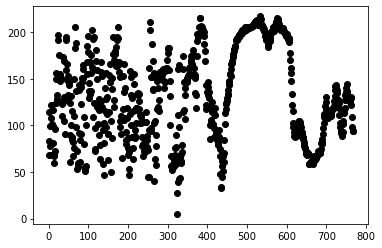

In [14]:
# Your answer here
D768 = dct(768)
x=image[:,0] #first column of image
plot_vector(x)

**5.3 (d)** Compute the 768 x 1024 matrix `dct_coeffs` whose columns are the dct coefficients of the columns of `image`. Plot an histogram of there intensities using `plt.hist`.

In [43]:
# Your answer here
dct_coeffs=np.asmatrix(np.transpose(D768)@image)
dct_coeffs

matrix([[ 3.69760371e+03,  3.68750008e+03,  3.68324213e+03, ...,
          2.76752852e+03,  2.77770431e+03,  2.78239528e+03],
        [-1.70009880e+02, -1.47530685e+02, -1.24721250e+02, ...,
         -2.94385049e+02, -2.95073371e+02, -2.94449497e+02],
        [-3.20494713e+02, -3.22259880e+02, -3.22860573e+02, ...,
          1.55392173e+02,  1.59728352e+02,  1.62249371e+02],
        ...,
        [-2.23562893e+00,  2.46646493e+00,  2.73527547e+00, ...,
          5.04676170e-01, -6.39302712e-01, -1.30067209e+00],
        [ 6.04416872e-01,  3.95835651e-01, -1.56126486e+00, ...,
         -8.26403414e-01, -1.40428402e+00, -2.47817407e+00],
        [-5.93421784e-01, -4.95068092e-01, -1.30208160e+00, ...,
         -9.54782266e-01, -4.25602612e-01,  2.08322852e-01]])

(array([[  0., 161., 605., ...,   0.,   0.,   1.],
        [  0., 157., 609., ...,   0.,   0.,   1.],
        [  0., 158., 609., ...,   0.,   0.,   1.],
        ...,
        [  0., 142., 625., ...,   1.,   0.,   0.],
        [  0., 141., 626., ...,   1.,   0.,   0.],
        [  0., 142., 625., ...,   1.,   0.,   0.]]),
 array([-1064.43123878,  -537.21884715,   -10.00645553,   517.20593609,
         1044.41832772,  1571.63071934,  2098.84311097,  2626.05550259,
         3153.26789421,  3680.48028584,  4207.69267746]),
 <a list of 1024 Lists of Patches objects>)

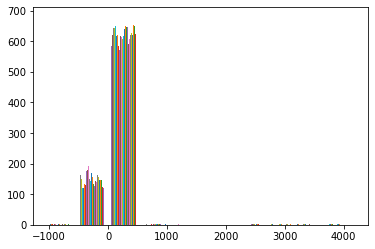

In [26]:
plt.hist(dct_coeffs)

Since a large fraction of the dct coefficients seems to be negligible, we see that the vector `x` can be well approximated by a linear combination of a small number of discrete cosines vectors.

Hence, we can 'compress' the image by only storing a few dct coefficients of largest magnitude.

Let's say that we want to reduce the size by $98\%$:
Store only the top $2\%$ largest (in absolute value) coefficients of `wavelet_coeffs`.

**5.3 (e)** Compute a matrix `thres_coeffs` who is the matrix `dct_coeffs` where about $97\%$ smallest entries have been put to 0.

In [27]:
# Your answer here

In [44]:
#find 97% quantile of dcf_coefficents, any entry <= threshold will be rounded to 0
thres=np.percentile(np.abs(dct_coeffs), 97, interpolation='lower')
thres

96.87766634486641

In [45]:
thres_coeffs=dct_coeffs
thres_coeffs[np.abs(thres_coeffs)<=thres]=0
thres_coeffs

matrix([[3697.60371463, 3687.50008492, 3683.24212669, ..., 2767.52851536,
         2777.70431385, 2782.39528479],
        [-170.00988   , -147.53068464, -124.72125038, ..., -294.3850494 ,
         -295.07337131, -294.44949706],
        [-320.49471312, -322.25987969, -322.86057333, ...,  155.39217275,
          159.72835212,  162.24937077],
        ...,
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ]])

In [46]:
np.count_nonzero(thres_coeffs)/(768*1024) #verify it's around 97%

0.030000050862630207

**5.3 (f)** Compute and plot the `compressed_image` corresponding to `thres_coeffs`.

In [47]:
# Your answer here
#same logic as obtaining x from v
compressed_image=D768@thres_coeffs
compressed_image

matrix([[105.69185635, 103.20808326, 128.29129641, ..., 128.65718439,
         131.68562221, 139.26072638],
        [105.05747972,  99.44312593, 122.97296956, ..., 128.09197774,
         130.9045184 , 138.31606684],
        [103.67480347,  93.10449597, 113.90776759, ..., 126.95957388,
         129.34964937, 136.43966497],
        ...,
        [124.70277416, 134.10709137, 143.21317906, ..., 113.57680488,
         105.92902752, 102.25939843],
        [119.74381372, 135.86680284, 144.54053675, ..., 110.1110102 ,
         102.0969632 ,  98.29853036],
        [116.69573863, 136.80971658, 145.18843765, ..., 108.29393422,
         100.09347457,  96.23138988]])

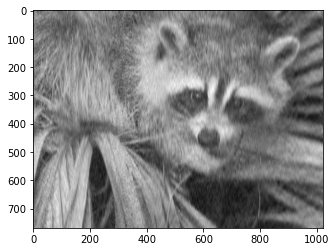

In [48]:
plt.imshow(compressed_image)